In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, Matrix, solve, diff

# Ejercicio 1

In [2]:
def rk4(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = y0
    
    for i in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    
    return y

In [3]:
def rk4_system(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = np.array(y0)
    
    for i in range(n):
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    
    return y

# Ejercicio 2

## 2a
Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.


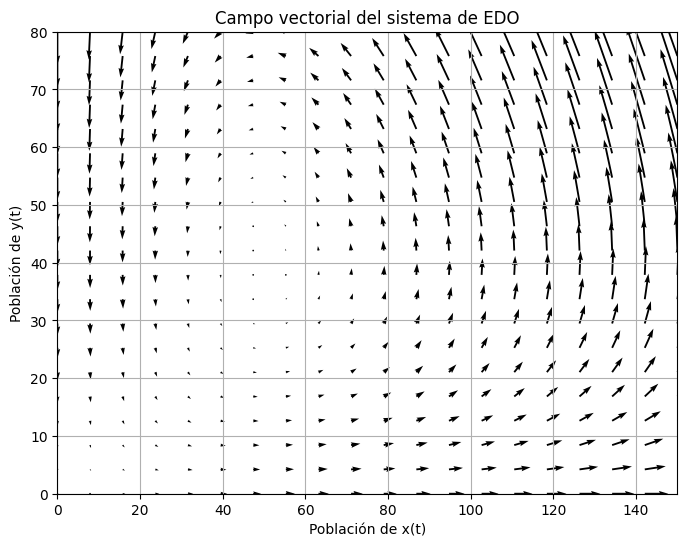

In [4]:
def dx_dt(x, y):
    return 0.2*x - 0.005*x*y

def dy_dt(x, y):
    return -0.5*y + 0.01*x*y

x = np.linspace(0, 150, 20)
y = np.linspace(0, 80, 20)
X, Y = np.meshgrid(x, y)

U = dx_dt(X, Y)
V = dy_dt(X, Y)

# Graficar el campo vectorial
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V)
plt.title("Campo vectorial del sistema de EDO")
plt.xlabel("Población de x(t)")
plt.ylabel("Población de y(t)")
plt.xlim([0, 150])
plt.ylim([0, 80])
plt.grid(True)
plt.show()


## 2b
Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (sólo los que están en el primero cuadrante, incluyendo los ejes y el origen) y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente cómo se comportan las soluciones cerca del punto de equilibro obtenido.

In [5]:
x, y = symbols('x y')
f1 = 0.2*x - 0.005*x*y
f2 = -0.5*y + 0.01*x*y

# Calcular la matriz Jacobiana
jacobian_matrix = Matrix([[diff(f1, x), diff(f1, y)], [diff(f2, x), diff(f2, y)]])

# Evaluar la matriz Jacobiana en los puntos de equilibrio
equilibrium_points = [(0, 0), (0, 40), (50, 0), (50, 40)]
for point in equilibrium_points:
    jacobian_at_point = jacobian_matrix.subs({x: point[0], y: point[1]})
    eigenvalues = jacobian_at_point.eigenvals()
    print(f"Punto de equilibrio: {point}")
    print(f"Jacobian:\n{jacobian_at_point}")
    print(f"Valores propios: {eigenvalues}\n")


Punto de equilibrio: (0, 0)
Jacobian:
Matrix([[0.200000000000000, 0], [0, -0.500000000000000]])
Valores propios: {0.200000000000000: 1, -0.500000000000000: 1}

Punto de equilibrio: (0, 40)
Jacobian:
Matrix([[0, 0], [0.400000000000000, -0.500000000000000]])
Valores propios: {0: 1, -0.500000000000000: 1}

Punto de equilibrio: (50, 0)
Jacobian:
Matrix([[0.200000000000000, -0.250000000000000], [0, 0]])
Valores propios: {0.200000000000000: 1, 0: 1}

Punto de equilibrio: (50, 40)
Jacobian:
Matrix([[0, -0.250000000000000], [0.400000000000000, 0]])
Valores propios: {-0.316227766016838*I: 1, 0.316227766016838*I: 1}



## 2c
Resuelva el sistema de EDO, con su algoritmo de Runge-Kutta, para la condición inicial 

x(0) = 70, y(0) = 30

Obtenga una gráfica de la solución obtenida, y estime cuál sería la población x & y después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

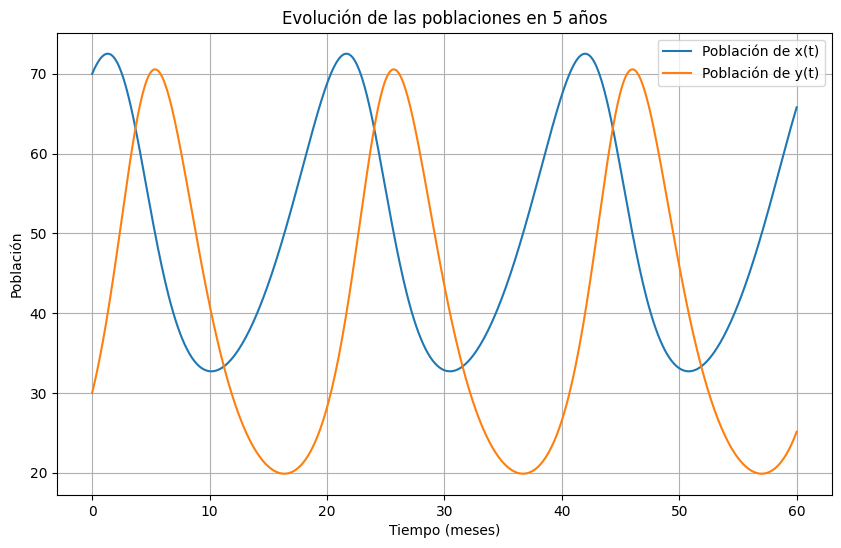

Población de x después de 5 años: 65.80281308173875
Población de y después de 5 años: 25.13725727333798


In [6]:
def f(t, Y):
    x, y = Y
    dxdt = 0.2*x - 0.005*x*y
    dydt = -0.5*y + 0.01*x*y
    return np.array([dxdt, dydt])

def rk4_system(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = np.array(y0)
    sol = np.zeros((n+1, len(y0)))
    time = np.zeros(n+1)
    sol[0] = y0
    time[0] = t0
    
    for i in range(1, n+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
        sol[i] = y
        time[i] = t
    
    return time, sol

y0 = [70, 30]
t0 = 0
tf = 60  # 5 años (60 meses)
h = 0.1

time, sol = rk4_system(f, y0, t0, tf, h)

plt.figure(figsize=(10, 6))
plt.plot(time, sol[:, 0], label='Población de x(t)')
plt.plot(time, sol[:, 1], label='Población de y(t)')
plt.title('Evolución de las poblaciones en 5 años')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

print(f"Población de x después de 5 años: {sol[-1, 0]}")
print(f"Población de y después de 5 años: {sol[-1, 1]}")

## 2d
Repita la solución del sistema de EDO, esta vez para la condición inicial 

x(0) = 100, y(0) = 10

Obtenga una gráfica de la solución obtenida, y estime cuál será la población para las especies x y y después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

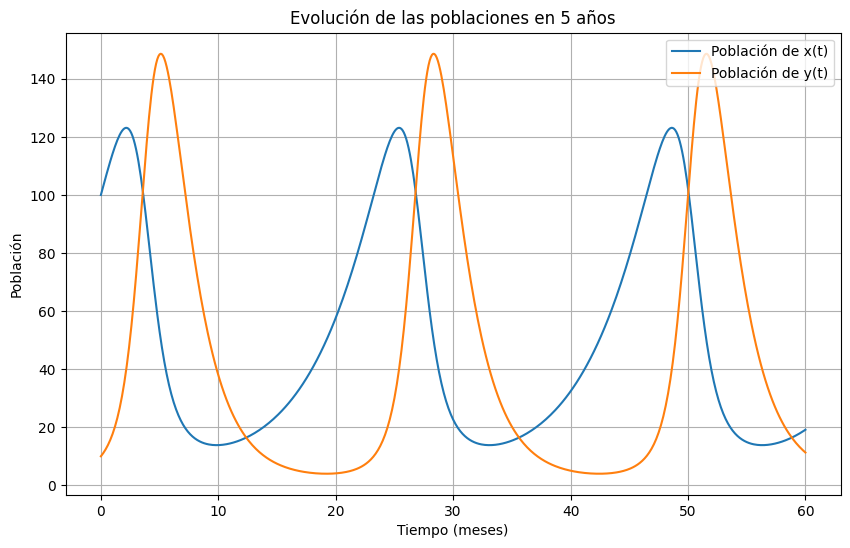

Población de x después de 5 años: 19.150564378249037
Población de y después de 5 años: 11.298504631881979


In [13]:
y0 = [100, 10]

time, sol2 = rk4_system(f, y0, t0, tf, h)

plt.figure(figsize=(10, 6))
plt.plot(time, sol2[:, 0], label='Población de x(t)')
plt.plot(time, sol2[:, 1], label='Población de y(t)')
plt.title('Evolución de las poblaciones en 5 años')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

print(f"Población de x después de 5 años: {sol2[-1, 0]}")
print(f"Población de y después de 5 años: {sol2[-1, 1]}")


## 2e
Grafique ambas trayectorias obtenidas en su plano de fase xy (encima del campo vectorial). Ilustre en la gráfica el valor de la población inicial y final (a los 5 años) en cada caso.

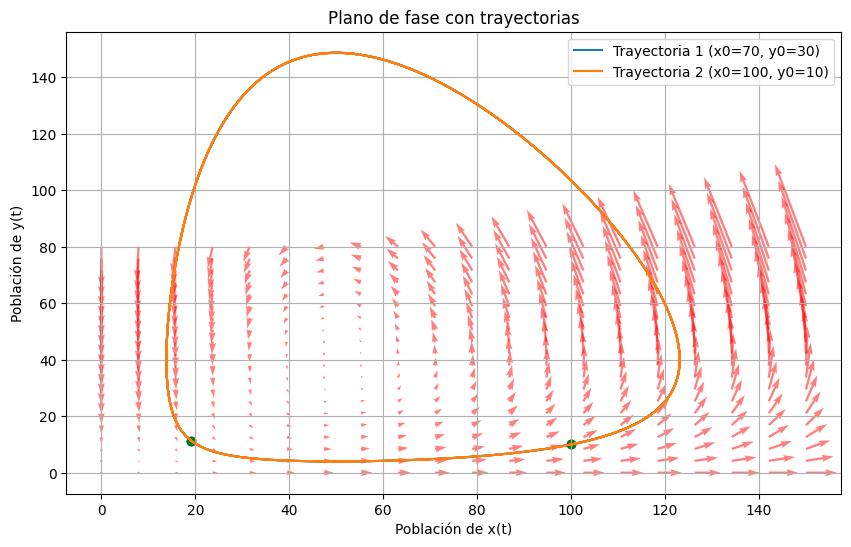

In [15]:
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, color='r', alpha=0.5)
plt.plot(sol[:, 0], sol[:, 1], label='Trayectoria 1 (x0=70, y0=30)')
plt.plot(sol2[:, 0], sol2[:, 1], label='Trayectoria 2 (x0=100, y0=10)')
plt.title('Plano de fase con trayectorias')
plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.scatter([sol[0, 0], sol[-1, 0]], [sol[0, 1], sol[-1, 1]], color='blue')  # Población inicial y final para la primera trayectoria
plt.scatter([sol2[0, 0], sol2[-1, 0]], [sol2[0, 1], sol2[-1, 1]], color='green')  # Población inicial y final para la segunda trayectoria
plt.grid(True)
plt.legend()
plt.show()

## 2f
Explique o describa cualitativamente el comportamiento del sistema de poblaciones.

- Punto de equilibrio (0, 0): punto de equilibrio trivial donde ambas poblaciones se extinguen. Punto de silla.

- Punto de equilibrio (50, 0): la población de 𝑦 se extingue y la de 𝑥 permanece en 50. Punto de silla.

- Punto de equilibrio (0, 40): Aquí la población de 𝑥 se extingue mientras la de 𝑦 permanece en 40. Punto de silla.

- Punto de equilibrio (50, 40): suele ser un nodo o foco, dependiendo de los valores propios del Jacobiano. En este punto, ambas poblaciones coexisten y muestran un comportamiento oscilatorio o estable alrededor de este mismo punto.

Como se mencionó anteriormente, las trayectorias ciclan alrededor del punto (50, 40), lo cual promueve o sugiere un comportamiento oscilatorio. Esto hace llegar a la conclusión que una especie influye sobre la otra de forma cíclica.